# Sklearn

## Bike Sharing Demand
Задача на kaggle: https://www.kaggle.com/c/bike-sharing-demand

По историческим данным о прокате велосипедов и погодным условиям необходимо оценить спрос на прокат велосипедов.

В наборе признаков присутствуют вещественные, категориальные, и бинарные данные. 

Для демонстрации используется обучающая выборка из исходных данных train.csv.

### Библиотеки

In [3]:
from sklearn import model_selection, grid_search, linear_model, metrics

import numpy as np
import pandas as pd
import pylab
import warnings
warnings.filterwarnings('ignore')

% matplotlib inline

### Загрузка данных

- считываем csv файл в DataFrame
- указываем, что данные в исходном файле разделяются запятой (sep = ',') 
- при (header = 0) название столбцов извлекается из первой строки исходного файла

In [4]:
raw_data = pd.read_csv('../Documents/bike/train.csv', header = 0, sep = ',')

Выводим первые 5 строк считанной таблицы



In [5]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


***datetime*** - hourly date + timestamp  

***season*** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

***holiday*** - whether the day is considered a holiday

***workingday*** - whether the day is neither a weekend nor holiday

***weather*** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    
***temp*** - temperature in Celsius

***atemp*** - "feels like" temperature in Celsius

***humidity*** - relative humidity

***windspeed*** - wind speed

***casual*** - number of non-registered user rentals initiated

***registered*** - number of registered user rentals initiated

***count*** - number of total rentals

In [6]:
raw_data.shape # количество строк и столбцов соответственно

(10886, 12)

In [7]:
raw_data.isnull().values.any() # проверяет, если ли пропущенные значения 

False

Пропущенных значений в данных нет.

### Предобработка данных

#### Типы признаков

Узнаем каким типом данных является каждый признак.

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


Переведем признак datetime из типа object в тип datetime, чтобы использовать специальные функции именно для типа datetime.

In [9]:
raw_data.datetime = raw_data.datetime.apply(pd.to_datetime)

In [10]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


Создадим новые признаки (месяц, час, день недели и год) на основе столбца datetime с помощью функции apply.

apply применяет функцию для каждого объекта внутри определенного столбца.


In [12]:
raw_data['month'] = raw_data.datetime.apply(lambda x : x.month)
raw_data['hour'] = raw_data.datetime.apply(lambda x : x.hour)
raw_data['week_day'] = raw_data.datetime.apply(lambda x : x.weekday() + 1)
raw_data['year'] = raw_data.datetime.apply(lambda x : x.year)

In [13]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,week_day,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,6,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,6,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,6,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,6,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,6,2011


Посмотрим в каких временных рамках мы работаем.

In [14]:
print(raw_data.datetime.min())
print(raw_data.datetime.max())

2011-01-01 00:00:00
2012-12-19 23:00:00


Посмотрим количество велосипедов, необходимых в каждом месяце определенного года, с помощью функции groupby.

In [15]:
grouped = raw_data.groupby(by = ['year', 'month']).aggregate(np.sum)[['count']].reset_index()

In [16]:
grouped.head()

,year,month,count
0,2011,1,23552
1,2011,2,32844
2,2011,3,38735
3,2011,4,50517
4,2011,5,79713


Тоже самое, но в другой записи.

In [17]:
grouped2 = raw_data[['year', 'month', 'count']].groupby(by = ['year', 'month']).aggregate(np.sum).reset_index()


In [18]:
grouped2.head()

,year,month,count
0,2011,1,23552
1,2011,2,32844
2,2011,3,38735
3,2011,4,50517
4,2011,5,79713


Добавим столбец date содержащую год и месяц в формате year_month

In [19]:
grouped2['date'] = grouped2.apply(lambda raw : str(raw['year']) + '_' + str(raw['month']), axis = 1)
grouped2.head()

,year,month,count,date
0,2011,1,23552,2011_1
1,2011,2,32844,2011_2
2,2011,3,38735,2011_3
3,2011,4,50517,2011_4
4,2011,5,79713,2011_5


Посмотрим количество велосипедов необходимых в каждом месяце 2012 года.

In [20]:
tmp = grouped2[grouped2.year == 2012][['month', 'count']]

In [21]:
tmp

,month,count
12,1,56332
13,2,66269
14,3,94766
15,4,116885
16,5,120434
17,6,130957
18,7,121769
19,8,130220
20,9,133425
21,10,127912


Тоже самое можно сделать другим способом.

In [22]:
frame = pd.DataFrame()
frame['month'] = grouped2[grouped2.year == 2011][['month']]
frame['count_2011'] = grouped2[grouped2.year == 2011][['count']]
frame

,month,count_2011
0,1,23552
1,2,32844
2,3,38735
3,4,50517
4,5,79713
5,6,89776
6,7,92848
7,8,83296
8,9,79104
9,10,79522


Соединим данные frame c tmp. В обеих таблицах есть столбец month со значениями count для каждого месяца, поэтому соединять будем по столбцу month.

In [23]:
frame = frame.merge(tmp, on = 'month')

In [24]:
frame.columns = ['month', 'count_2011', 'count_2012']

In [25]:
frame

,month,count_2011,count_2012
0,1,23552,56332
1,2,32844,66269
2,3,38735,94766
3,4,50517,116885
4,5,79713,120434
5,6,89776,130957
6,7,92848,121769
7,8,83296,130220
8,9,79104,133425
9,10,79522,127912


Сравним какое количество велосипедов требовалось в каждом месяце в 2011 и 2012 годах.

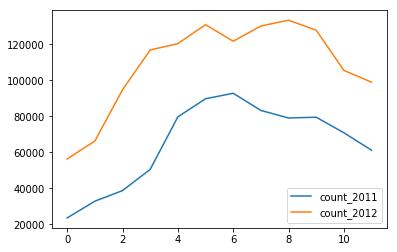

In [26]:
frame[['count_2011', 'count_2012']].plot()

Для каждого года по отдельности.

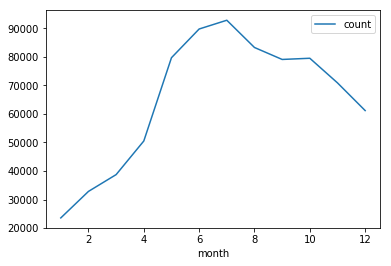

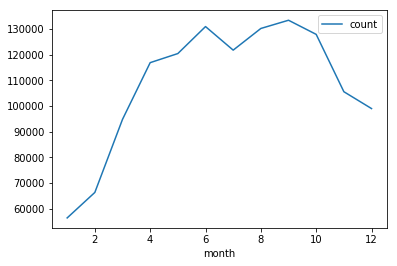

In [27]:
grouped2[grouped2.year == 2011].plot(x = 'month', y = 'count')
grouped2[grouped2.year == 2012].plot(x = 'month', y = 'count')

### Обучение и отложенный тест

Данные имеют явную временную привязку, поэтому удобнее разбить выборку так, чтобы обучать модель на данных за более ранний период и оценивать качество данных за более поздний период.

In [28]:
train_data = raw_data.iloc[:-1000, :] # первые 10886 - 1000 = 9886 объектов
hold_out_test_data = raw_data.iloc[-1000:, :] # последняя тысяча объектов

In [29]:
print('Размер исходной выборки: ', raw_data.shape)
print('Размер выборки для обучения: ', train_data.shape)
print('Размер выборки для теста: ', hold_out_test_data.shape)

Размер исходной выборки:  (10886, 16)
Размер выборки для обучения:  (9886, 16)
Размер выборки для теста:  (1000, 16)


In [30]:
print('Период выборки для обучения с {} по {}'.format(train_data.datetime.min(), train_data.datetime.max()))
print('Период выборки для теста с {} по {}'.format(hold_out_test_data.datetime.min(), hold_out_test_data.datetime.max()))

Период выборки для обучения с 2011-01-01 00:00:00 по 2012-10-16 06:00:00
Период выборки для теста с 2012-10-16 07:00:00 по 2012-12-19 23:00:00


### Данные и целевая функция

Для применения модели в sklearn необходимо отделить целевую метку от остальных данных.

1) Сохраним столбец ответов (count) в переменную train_labels и test_labels

In [31]:
#обучение
train_labels = train_data['count'].values

#тест
test_labels = hold_out_test_data['count'].values

2) Затем удалим столбец ответов (count) и столбец datetime из таблицы для обучения и теста

In [32]:
#обучение
train_data = train_data.drop(['datetime', 'count'], axis = 1)

#тест
test_data = hold_out_test_data.drop(['datetime', 'count'], axis = 1)

### Целевая функция на обучающей выборке и на отложенном тесте

Визуализируем целевую переменную и посмотрим на ее распределение на обучении и тесте.

Text(0.5,1,'test data')

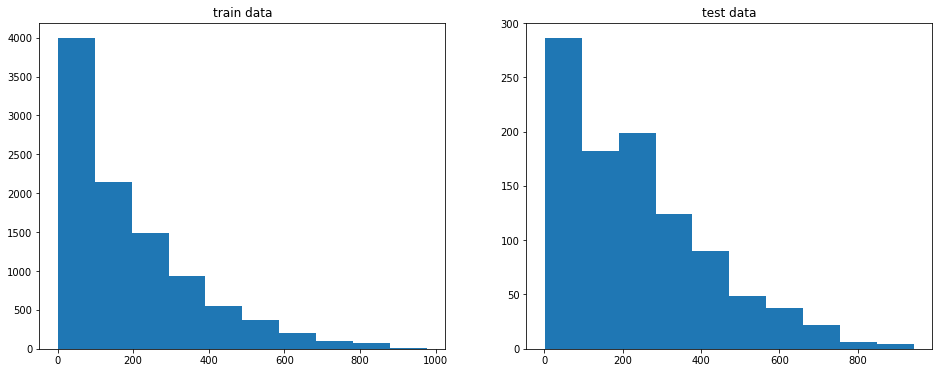

In [33]:
pylab.figure(figsize = (16, 6))

pylab.subplot(1,2,1)
pylab.hist(train_labels)
pylab.title('train data')

pylab.subplot(1,2,2)
pylab.hist(test_labels)
pylab.title('test data')

Распределения отличаются, однако и во время обучения и во время теста большую часть времени было занято не более 300 велосипедов.

### Числовые признаки

Отделим признаки только с числовым типом данных (int64, float64) от остальных данных и будем работать только с той частью выборки, которая соответствует этим признакам.

In [34]:
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'month', 'hour', 'year']

In [35]:
train_data = train_data[numeric_columns]
test_data = test_data[numeric_columns]

In [36]:
train_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour,year
0,9.84,14.395,81,0.0,3,13,1,0,2011
1,9.02,13.635,80,0.0,8,32,1,1,2011
2,9.02,13.635,80,0.0,5,27,1,2,2011
3,9.84,14.395,75,0.0,3,10,1,3,2011
4,9.84,14.395,75,0.0,0,1,1,4,2011


In [37]:
test_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour,year
9886,17.22,21.210,67,6.0032,20,505,10,7,2012
9887,18.04,21.970,62,0.0000,35,800,10,8,2012
9888,19.68,23.485,55,16.9979,32,323,10,9,2012
9889,20.50,24.240,48,19.0012,65,157,10,10,2012
9890,20.50,24.240,45,27.9993,56,172,10,11,2012


In [38]:
train_data.describe() # описание данных для обучения для каждого признака

,temp,atemp,humidity,windspeed,casual,registered,month,hour,year
count,9886.000000,9886.000000,9886.000000,9886.000000,9886.000000,9886.000000,9886.000000,9886.000000,9886.000000
mean,20.749003,24.193210,61.580012,12.858876,36.786567,150.682278,6.031357,11.538944,2011.451548
std,7.914962,8.612127,19.400891,8.243959,50.861132,148.035930,3.225974,6.916852,0.497672
min,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2011.000000
25%,13.940000,16.665000,46.000000,7.001500,4.000000,34.000000,3.000000,6.000000,2011.000000
50%,21.320000,25.000000,62.000000,12.998000,17.000000,113.000000,6.000000,12.000000,2011.000000
75%,27.060000,31.060000,77.000000,16.997900,50.000000,216.000000,9.000000,18.000000,2012.000000
max,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,12.000000,23.000000,2012.000000


In [39]:
test_data.describe() # описание тестовых данных для каждого признака

,temp,atemp,humidity,windspeed,casual,registered,month,hour,year
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,15.108500,18.335175,64.9160,12.211366,28.463000,203.696000,11.367000,11.568000,2012.0
std,3.560087,4.176557,17.3501,7.310975,39.205302,170.786169,0.640876,6.909205,0.0
min,6.560000,9.090000,16.0000,0.000000,0.000000,1.000000,10.000000,0.000000,2012.0
25%,12.300000,15.150000,52.0000,7.001500,5.000000,64.000000,11.000000,6.000000,2012.0
50%,14.760000,17.425000,63.0000,11.001400,16.000000,178.000000,11.000000,12.000000,2012.0
75%,17.220000,21.210000,81.0000,16.997900,34.000000,302.000000,12.000000,18.000000,2012.0
max,27.060000,31.060000,100.0000,43.000600,304.000000,839.000000,12.000000,23.000000,2012.0


### Модель

Создадим модель SGDRegressor (регрессия на основе стохастического градиентного спуска)

In [40]:
regressor = linear_model.SGDRegressor(random_state = 0)

Обучаем модель на данных для обучения

In [41]:
regressor.fit(train_data, train_labels)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
       warm_start=False)

Предсказываем значения целевой ответов на тестовой выборки и подсчитываем ошибку с помощью метрики MAE

### MAE =  $\frac{1}{n}\sum_{j=1}^{n}|y_j - ŷ_j|$ 

In [42]:
metrics.mean_absolute_error(test_labels, regressor.predict(test_data))

281908708562256.56

Получили огромную ошибку, поэтому стоит сравнить ответы и предсказания на тестовой выборке.

In [43]:
print(test_labels[:10])

[525 835 355 222 228 325 328 308 346 446]


In [44]:
print(regressor.predict(test_data)[:10])

[-5.04311877e+14 -7.24125558e+14 -3.38901800e+14 -2.40144889e+14
 -2.09430445e+14 -2.97545815e+14 -3.06732288e+14 -2.94558572e+14
 -3.05473409e+14 -3.76658903e+14]


Предсказанные ответы являются невероятно большими числамии. Так быть не должно.

Посмотрим на коэффициенты регрессии, чтобы понять в чем проблема.

In [45]:
print(regressor.coef_)

[-1.02967083e+12 -1.24526954e+12 -2.70504794e+12  2.54162739e+12
 -1.09288312e+12 -6.77823485e+11 -1.97997457e+10  6.08865995e+10
  3.46629829e+10]


Коэффициенты огромные.

Почему так получилось? 

Линейные модели очень чувствительны к масштабу признаков. В данном случае мы работаем с набором данных, в котором признаки могут сильно отличаться друг от друга. Для того чтобы решить эту проблему необходимо отмасштабировать признаки в наборе данных.

### Scaling

Стандартизация является такой предобработкой данных, 
после которой каждый признак имеет среднее 0 и дисперсию 1.

## $z = \frac{x-μ}{σ}$ 
$μ - $среднее значение по всем объектам$ $ 

$σ - $стандартное отклонение$ $


In [46]:
from sklearn.preprocessing import StandardScaler

Cоздаем scaler, обучаем его исключительно на обучающей выборке, т.к в реальной жизни мы не знаем ничего про тестовые данные.

In [47]:
scaler = StandardScaler()
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [48]:
regressor.fit(scaled_train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))

0.11065315210996257

In [49]:
print(test_labels[:10])

[525 835 355 222 228 325 328 308 346 446]


In [50]:
print(regressor.predict(scaled_test_data)[:10])

[524.83698603 834.84175856 354.86396113 221.89530717 227.84744926
 324.88597616 327.90091315 307.93455794 345.9037671  445.90398138]


Ошибка стала очень мала и это подозрительно хорошо.

### Подозрительно хорошо?

Посмотрим на коэффициенты регрессии.

In [51]:
print(regressor.coef_)

[ 1.29448025e+00 -1.29043936e+00  1.31933375e-02 -4.05940107e-02
  5.08590616e+01  1.48007111e+02 -9.50811646e-03  5.13469808e-03
 -3.11281720e-03]


In [52]:
print(list(map(lambda x : round(x, 2), regressor.coef_)))

[1.29, -1.29, 0.01, -0.04, 50.86, 148.01, -0.01, 0.01, -0.0]


Практически все веса принимают маленькие значения за исключением двух.

In [53]:
train_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour,year
0,9.84,14.395,81,0.0,3,13,1,0,2011
1,9.02,13.635,80,0.0,8,32,1,1,2011
2,9.02,13.635,80,0.0,5,27,1,2,2011
3,9.84,14.395,75,0.0,3,10,1,3,2011
4,9.84,14.395,75,0.0,0,1,1,4,2011


Как видим, это признаки casual и registered, которые представляют количество незарегистрированных и зарегистрированных пользователей, которые хотят арендовать велосипед.

Посмотрим на значение целевой функции

In [54]:
train_labels[:10]

array([16, 40, 32, 13,  1,  1,  2,  3,  8, 14])

Видим закономерность, что если сложить значения этих признаков для каждого объекта, то получится соответствующее значение целевой переменной.

Проверим это на всех объектах.

In [55]:
np.all(train_data.registered + train_data.casual == train_labels)

True

Это значит, что мы использовали признаки, по которым однозначно восстанавливается целевая функция. Так делать не следует, поэтому исключим эти признаки.

In [56]:
train_data.drop(['casual', 'registered'], axis = 1, inplace = True)
test_data.drop(['casual', 'registered'], axis = 1, inplace = True)

Отмасштабируем признаки на новом наборе данных.

In [57]:
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [58]:
regressor.fit(scaled_train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))

126.21502118610957

Эта оценка уже реалистична.

In [59]:
from sklearn.metrics import r2_score

In [60]:
r2_score(test_labels, regressor.predict(scaled_test_data))

0.2580706773879303

In [61]:
print(list(map(lambda x : round(x, 2), regressor.coef_)))

[21.95, 29.22, -39.65, 7.39, 24.92, 51.96, 41.64]


Теперь каждый коэффициент вносит вклад в общую регрессию.

### Pipeline

Для того чтобы реализовывать цепочку преобразований существует Pipeline.

In [62]:
from sklearn.pipeline import Pipeline

Цепочка нашего пайплайна:

1) масштабирование признаков
2) обучение модели

Шаги в пайплайне принимаются в формате ('название шага', объект).

Важно чтобы объекты в пайплайне имели функции fit_tranform или fit_predict.

In [63]:
pipeline = Pipeline(steps = [('scaling', scaler), ('regression', regressor)])

In [64]:
pipeline.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, pipeline.predict(test_data))

126.21502118610957

### Подбор параметров

Подбирать параметры будем о сетке.

Для построения сетки необходимо знать названия параметров.

In [65]:
regressor.get_params().keys()

dict_keys(['alpha', 'average', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'verbose', 'warm_start'])

И как к ним обращаться в пайплайне.

In [66]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'scaling', 'regression', 'scaling__copy', 'scaling__with_mean', 'scaling__with_std', 'regression__alpha', 'regression__average', 'regression__epsilon', 'regression__eta0', 'regression__fit_intercept', 'regression__l1_ratio', 'regression__learning_rate', 'regression__loss', 'regression__max_iter', 'regression__n_iter', 'regression__penalty', 'regression__power_t', 'regression__random_state', 'regression__shuffle', 'regression__tol', 'regression__verbose', 'regression__warm_start'])

Построим словарь параметров, которые мы хотим перебирать.

In [67]:
parameters_grid = {
    'regression__loss' : ['huber', 'epsilon_insensitive', 'squared_loss', ],
    'regression__n_iter' : [3, 5, 10, 50], 
    'regression__penalty' : ['l1', 'l2', 'none'],
    'regression__alpha' : [0.0001, 0.01],
    'scaling__with_mean' : [0, 1],
}

Строим сетку. Передаем пайплайн, словарь параметров для перебора, будем оценивать метрику с помощью средней ошибки (scoring) и делать кросс-валидацию на 4 фолда (cv).

In [68]:
grid_cv = grid_search.GridSearchCV(pipeline, parameters_grid, scoring = 'mean_absolute_error', cv = 4)

In [69]:
%%time
grid_cv.fit(train_data, train_labels)

CPU times: user 7.55 s, sys: 40.1 ms, total: 7.59 s
Wall time: 7.62 s


GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regression', SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
       warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'regression__loss': ['huber', 'epsilon_insensitive', 'squared_loss'], 'regression__n_iter': [3, 5, 10, 50], 'regression__penalty': ['l1', 'l2', 'none'], 'regression__alpha': [0.0001, 0.01], 'scaling__with_mean': [0, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_absolute_error',
       verbose=0)

Получим значение ошибки лучшей модели и ее параметры.

In [70]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-108.39320949709902
{'regression__alpha': 0.01, 'regression__loss': 'squared_loss', 'regression__n_iter': 3, 'regression__penalty': 'l2', 'scaling__with_mean': 1}


### Оценка по отложенному тесту

Оценим лучшую модель на отложенной выборке

In [71]:
metrics.mean_absolute_error(test_labels, grid_cv.best_estimator_.predict(test_data))

127.0944947298287

Посмотрим какой в среднем спрос на велосипеды

In [72]:
np.mean(test_labels)

232.159

Видим что в среднем у нас 232 велосипеда, а ошибаемся на 127. Это плохо. И улучшение модели с помощью поиска по сетке не дало ощутимое улучшение. 

In [73]:
test_predictions = grid_cv.best_estimator_.predict(test_data)

Сравним ответы и предсказания.

In [74]:
print(test_labels[:10])

[525 835 355 222 228 325 328 308 346 446]


In [75]:
print(test_predictions[:10])

[199.6608881  218.86729741 263.52215984 292.49984067 312.31750999
 320.79172293 325.93313273 350.03162855 356.37237377 365.80850114]


Создадим функцию, которая подсчитывает процент ошибки на каждом объекте.

In [76]:
def mean_percentage_error(test_labels, test_predictions):
    pairs = zip(test_labels, test_predictions) # пары значений ответов и предсказаний объекта
    error = []
    for i in pairs:
        error.append(100 * abs(i[0] - i[1])/i[0]) # процент средней ошибки объекте
    return error

In [77]:
errors = mean_percentage_error(test_labels, grid_cv.best_estimator_.predict(test_data))

Построим гистограмму, отображающую распределение средней ошибки на всех объектах.

(array([939.,  46.,   8.,   2.,   3.,   0.,   0.,   1.,   0.,   1.]),
 array([9.01926898e-03, 1.84133401e+03, 3.68265899e+03, 5.52398398e+03,
        7.36530897e+03, 9.20663396e+03, 1.10479589e+04, 1.28892839e+04,
        1.47306089e+04, 1.65719339e+04, 1.84132589e+04]),
 <a list of 10 Patch objects>)

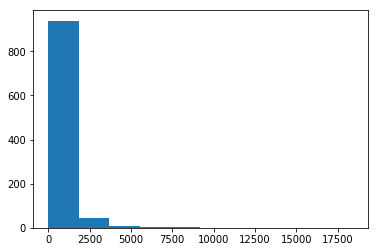

In [78]:
pylab.hist(errors)

Отобразим график объектов в пространстве правильных ответов целевой метки и предсказаний. Хорошая модель выдаст облако точек в районе диагонали, т.к предсказания в идеале должны совпасть со значениями целевой метки.

(-100, 1100)

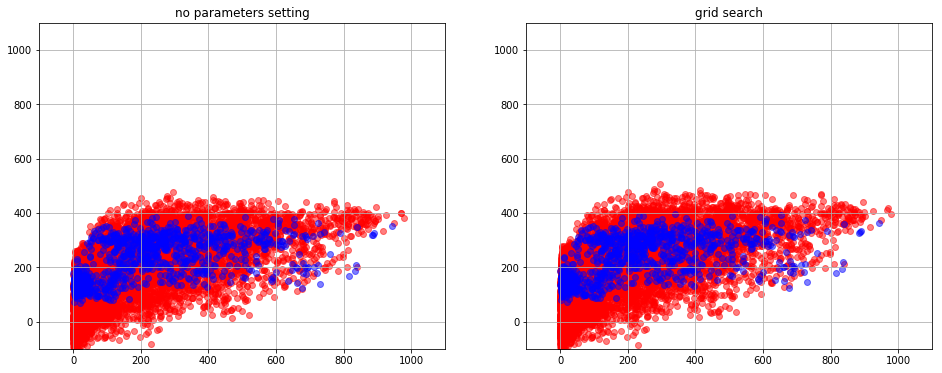

In [79]:
pylab.figure(figsize=(16, 6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.scatter(train_labels, pipeline.predict(train_data), alpha=0.5, color = 'red')
pylab.scatter(test_labels, pipeline.predict(test_data), alpha=0.5, color = 'blue')
pylab.title('no parameters setting')
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)

pylab.subplot(1,2,2)
pylab.grid(True)
pylab.scatter(train_labels, grid_cv.best_estimator_.predict(train_data), alpha=0.5, color = 'red')
pylab.scatter(test_labels, grid_cv.best_estimator_.predict(test_data), alpha=0.5, color = 'blue')
pylab.title('grid search')
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)

Вывод: модель является слабой и подбор по параметрам не дал желаемых улучшений.